# **Course: Data Science for Decision Support**
**Assignment 2** (Submission deadline 06.07.2022, 16:00), 

**Executor:** Eric Dietriche, Sesso Domtchoueng: 504999.

---
Your individual data for assignment 3:

| the second digit from the end of Matr.Nr. | Task2, Q4 | Task 3 Q1 | 
| ----------- | ----------- | ----------- |
| 9       |CatBoost       |   1,2 |







# Problem: **Classification** (Total score 50) 

# **`Task 1 “Prediction with neural networks” (20 Scores)`**

1) Do all preparation steps as in previous assignments to clean, scale and prepare the dataset
for the analysis. Use the best scaler from your previous assignments.

In [1]:
#add more cell if needed to each code cell
#Write your code here 
from google.colab import files
uploaded = files.upload()

Saving data_banknote_authentication.csv to data_banknote_authentication.csv


In [2]:
#add more cell if needed to each code cell
import pandas as pd
df = pd.read_csv("data_banknote_authentication.csv")

In [3]:
#Write your code here 
y = df['Class']
X = df.drop(['Class'],axis='columns')
print('Shape of X:', X.shape)
print('Shape of Y:', y.shape)

Shape of X: (1372, 4)
Shape of Y: (1372,)


In [4]:
#use value_count() for count unique value in column
count=0
for column in df:
        count +=  len(df[column].value_counts(dropna=False))
print("number of Instance:",count)
print("number of variable:",len(df.columns))

number of Instance: 5023
number of variable: 5


In [5]:
df.describe(include="all")

,VarianceWT,SkewnessWT,CurtosisWT,Image Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [23]:
#fill Nan Values with the mean values , if at least one value is nan-value. 
if (not (df.isnull().values.any())):
      print("There are no NAN values")
else:
  for column in df:
    if df[column].isnull().values.any(): 
              df[column] = df[column].fillna(df[column].mean())
from sklearn.preprocessing import MinMaxScaler
minMax_scaler = pd.DataFrame(
    MinMaxScaler().fit_transform(df),
    columns = df.columns
)
Y_minMax_scale = minMax_scaler['Class']
X_minMax_scale = minMax_scaler.drop(['Class'],axis='columns')
minMax_scaler


There are no NAN values


,VarianceWT,SkewnessWT,CurtosisWT,Image Entropy,Class
0,0.769004,0.839643,0.106783,0.736628,0.0
1,0.835659,0.820982,0.121804,0.644326,0.0
2,0.786629,0.416648,0.310608,0.786951,0.0
3,0.757105,0.871699,0.054921,0.450440,0.0
4,0.531578,0.348662,0.424662,0.687362,0.0
...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1.0
1368,0.407690,0.332868,0.506753,0.808350,1.0
1369,0.237385,0.011768,0.985603,0.524755,1.0
1370,0.250842,0.201701,0.761587,0.660675,1.0


2) Construct a fully connected neural network using keras library. The network should contain
1-2 hidden layers. Experiment with different number of neurons for each layer, try several
dropout layers between hidden layers. Try to achieve the performance near or better than
the best one of your previous methods. Present the performance results (prediction results,
accuracy, precision, recall, F1 metrics over training set, ROC-AUC score) for the testset with
3 best architectures as a table. Use repeated holdout cross-validation, generating 5 random
training sets and test sets with proportion according to your individual variant in
assignment 2. 

In [ ]:
!pip install scikeras

In [8]:
import numpy as np
import pandas as pd
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential

In [85]:
def create_model(inp_s):
  network = Sequential()
  network.add(Dense(512, activation='relu', input_shape=(inp_s,)))
  network.add(Dropout(0.5))
  network.add(Dense(12, activation='relu'))
  network.add(Dropout(0.5))
  network.add(Dense(2, activation='softmax'))
  network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return network
  model = KerasClassifier(model= create_model,inp_s=4, epochs = 20, batch_size=40)

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
models = []
for i in range(0,5):
  # Create training and test split
  X_train, X_test, y_train, y_test = train_test_split(X_minMax_scale, Y_minMax_scale, test_size=0.1)
  #
  # Create categorical labels
  #
  train_labels = to_categorical(y_train)
  test_labels = to_categorical(y_test)
  #
  # Fit the neural network
  model = KerasClassifier(model= create_model,inp_s=4, epochs = 20, batch_size=40)
  model.fit(X_train, train_labels, epochs=20, batch_size=40,verbose=0)
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  y_pred_prob= model.predict_proba(X_test)[:,1]
  # we have two classes . we can wompute the mean value for the two classe (0 ,1) for each metric ( F1 ,precsion, recall)
  report = classification_report(test_labels, y_pred,output_dict=True)
  precision = (report["0"]['precision'] + report["1"]['precision'])/2.0
  recall = (report["0"]['recall'] + report["1"]['recall'])/2.0
  report = classification_report(train_labels,  y_pred_train,output_dict=True)
  F1 = (report["0"]['f1-score'] + report["1"]['f1-score'])/2.0
  accuracy = accuracy_score(y_pred,test_labels)
  roc_auc = roc_auc_score(test_labels,y_pred_prob.reshape(-1, 1))
  models.append((y_pred,accuracy,precision,recall,F1,roc_auc))

4/4 [==============================] - 0s 3ms/step


In [111]:
def getKey(item):
  return item[1]
modelSort = sorted(models, key=getKey,reverse=True)

In [112]:
list_pred = [modelSort[0][0],modelSort[1][0],modelSort[2][0]]
accuracy = [modelSort[0][1],modelSort[1][1],modelSort[2][1]]
precision =[modelSort[0][2],modelSort[1][2],modelSort[2][2]]
recall= [modelSort[0][3],modelSort[1][3],modelSort[2][3]]
f1 = [modelSort[0][4],modelSort[1][4],modelSort[2][4]]
roc_auc =[modelSort[0][5],modelSort[1][5],modelSort[2][5]]
table =pd.DataFrame(list(zip(list_pred,accuracy,precision,recall,f1,roc_auc)),columns=['Prediction (test set)','accuray','precision','recall','F1','ROC AUC'])
table

,Prediction (test set),accuray,precision,recall,F1,ROC AUC
0,"[[0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1...",1.0,1.0,1.0,0.994267,0.0
1,"[[1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1...",1.0,1.0,1.0,0.994261,0.0
2,"[[0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0...",1.0,1.0,1.0,0.994261,0.0


# **`Task 2 “Evaluate the variable importance in your built deep neural network” (20 Scores) `**

1) Use “Drop column Importance” to calculate the variables importance of your build neural
networks. Present the results as a bar plot. (Use the code from the tutorial).



In [108]:
from sklearn.base import clone
def drop_col_feat_imp(model, X_train, y_train,random_state = 30):
  model_clone = clone(model)
  model_clone.random_state = random_state 
  model_clone.fit(X_train,y_train)
  benschmark_score = model_clone.score(X_train,y_train)
  importances = []
  for col in X_train.columns:
      model_clone  = KerasClassifier(model=create_model,inp_s=3, epochs=20, batch_size=40, verbose=0)  
      model_clone.random_state = random_state
      model_clone.fit(X_train.drop(col,axis=1),y_train)
      drop_col_score = model_clone.score(X_train.drop(col,axis=1),y_train)
      importances.append(benschmark_score - drop_col_score)
  importances_df = pd.DataFrame(importances,columns=['importances'], index =X_train.columns)
  return importances_df

In [109]:
importances_df=drop_col_feat_imp(model, X_train, train_labels)

Epoch 1/20
31/31 [==============================] - 1s 3ms/step - loss: 0.6295 - accuracy: 0.6507
Epoch 2/20
31/31 [==============================] - 0s 3ms/step - loss: 0.5751 - accuracy: 0.7229
Epoch 3/20
31/31 [==============================] - 0s 3ms/step - loss: 0.5035 - accuracy: 0.7820
Epoch 4/20
31/31 [==============================] - 0s 3ms/step - loss: 0.4582 - accuracy: 0.8096
Epoch 5/20
31/31 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8468
Epoch 6/20
31/31 [==============================] - 0s 3ms/step - loss: 0.3566 - accuracy: 0.8882
Epoch 7/20
31/31 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.8874
Epoch 8/20
31/31 [==============================] - 0s 3ms/step - loss: 0.2943 - accuracy: 0.9028
Epoch 9/20
31/31 [==============================] - 0s 3ms/step - loss: 0.2679 - accuracy: 0.9157
Epoch 10/20
31/31 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.9263
Epoch 11/20
31/31 [

In [88]:
import plotly.express as px
fig = px.bar(importances_df, x='importances', y=importances_df.index)
fig.show()

2) Use “Permutation Importance” method to calculate the variables importance of your build
neural networks. Present the results as a bar plot. Use from sklearn.inspection import permutation_importance. 


4/4 [==============================] - 0s 4ms/step


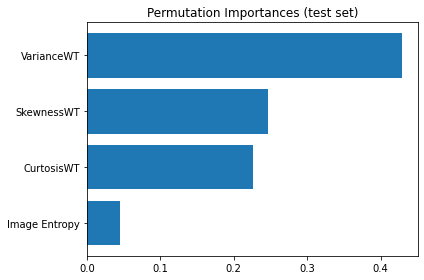

In [106]:
from sklearn.inspection import permutation_importance
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf
np.random.seed(1)
tf.random.set_seed(1)
result = permutation_importance(model, X_test, test_labels)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.barh(X_test.columns[sorted_idx], result.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

3) Take linear regression results of interpretability, which correspond to model coefficients
from assignment 1. Compare the results of three considered explainability methods with
coefficient of linear regression. .


In [92]:
from sklearn.linear_model  import LogisticRegression
reg = LogisticRegression()
reg = reg.fit(X_train,y_train)
reg.coef_

array([[-10.60773104,  -7.83099606,  -7.38413279,   0.4501256 ]])

The coefficients of the linear regresion model can be explained with the result of the explainability methodes (importances and permutation)

4)	The dashboard should make interactive changes in the Tabs, depending on the values of control elements

In [ ]:
!pip install catboost

In [94]:
from catboost import CatBoostClassifier
rf = CatBoostClassifier(verbose=0)
rf.fit(X_train, y_train)
df_feacture_importances = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train.columns),  reverse=True)
importances = []
features = []
for value,feature in df_feacture_importances :
    importances.append(value)
    features.append(feature)
df2 = pd.DataFrame(list(zip(importances,features)),columns=['importances','features'])
fig = px.bar(df2, x='importances', y='features')
fig.show()

# **`Task 3:“Evaluate the variable importance in your built deep neural network locally for several predictions” (10 scores) `**

1) Use “LIME” method to calculate the variables importance of your build neural networks
locally for several instances of the dataset. Select the instances to predict according to your
individual variant. Present the results as a bar plot. Use
lime.lime_tabular.LimeTabularExplainer in mode=”classificationregression”.

In [ ]:
!pip install lime

125/125 [==============================] - 0s 2ms/step
Intercept 0.5258189955236425
Prediction_local [0.7682201]
Right: 1
125/125 [==============================] - 0s 2ms/step
Intercept 0.7153454250590012
Prediction_local [0.1670164]
Right: 0


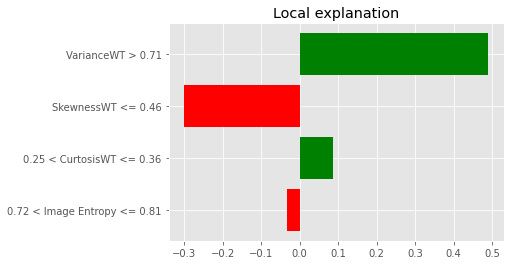

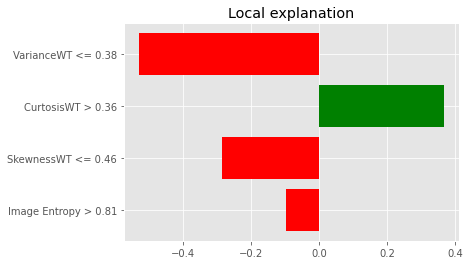

In [96]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['Class'], verbose=True, mode='regression')
for idx in [1,2]:
  explanation = explainer.explain_instance(X_test.iloc[idx], model.predict)
  with plt.style.context("ggplot"):
      explanation.as_pyplot_figure()


# **`Task 4: “Evaluate how independent variables influence the target variables construction Partial-Dependence Plots (PDP)” (10 scores) `**

3) Construct a PDP for each of the independent variables in your dataset. Use from sklearn.inspection import PartialDependenceDisplay. 

35/35 [==============================] - 0s 1ms/step


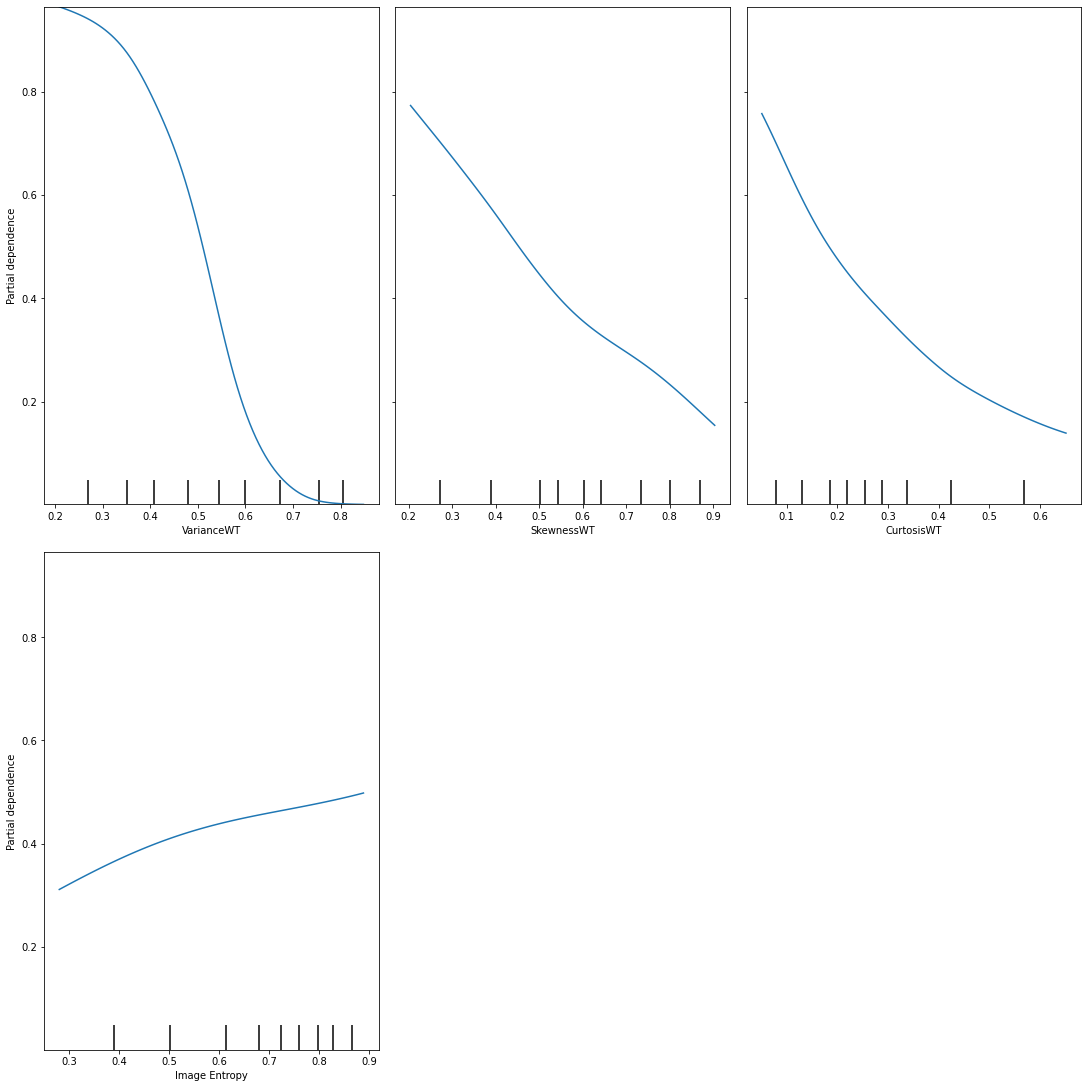

In [97]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15),constrained_layout=True)
ax.set_title("Neuronal network Keras")
PartialDependenceDisplay.from_estimator(model, X_minMax_scale,X_train.columns.values.tolist(),ax=ax)